# Let's import our dependencies that will be necessary to get our job done

In [14]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Model configuration

In [2]:
# Model configuration
img_weight, img_height = 28, 28
batch_size = 250
no_epochs = 25
no_classes = 10
validation_split = 0.2
verbosity = 1

# Load and preprocess the dataset

In [3]:
#Load datasets
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [4]:
sample_shape = input_train[0].shape
img_weight, img_height = sample_shape[0], sample_shape[1]
input_shape = (img_weight, img_height, 1)

In [5]:
# Reshape data
input_train = input_train.reshape(len(input_train), input_shape[0], input_shape[1], input_shape[2])
input_test = input_test.reshape(len(input_test), input_shape[0], input_shape[1], input_shape[2])

In [6]:
# Parse data as float
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [7]:
# Convert them into black or white (0,1)
input_train = input_train / 255
input_test = input_test / 255

# Prepare by converting the target vector with to_categorical

In [8]:
# Convert targeet vectors to categorical targets
target_train = tensorflow.keras.utils.to_categorical(target_train, no_classes)
target_test = tensorflow.keras.utils.to_categorical(target_test, no_classes)

In [9]:
# Create Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Model compilation and training process

We compile the model and start the training by fitting the model

In [10]:
# Compile the Model 
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
             optimizer=tensorflow.keras.optimizers.Adam(),
             metrics=['accuracy'])

# model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
#               optimizer=tensorflow.keras.optimizers.Adam(),
#               metrics=['accuracy'])

In [11]:
# Fit data to model
model.fit(input_train, target_train,
         batch_size = batch_size,
         epochs = no_epochs,
         validation_split = validation_split,
         verbose = verbosity)

Epoch 1/25
192/192 [==============================] - 41s 209ms/step - loss: 0.7134 - accuracy: 0.7858 - val_loss: 0.0962 - val_accuracy: 0.9706
Epoch 2/25
192/192 [==============================] - 40s 206ms/step - loss: 0.1092 - accuracy: 0.9658 - val_loss: 0.0621 - val_accuracy: 0.9815
Epoch 3/25
192/192 [==============================] - 38s 197ms/step - loss: 0.0715 - accuracy: 0.9777 - val_loss: 0.0611 - val_accuracy: 0.9813
Epoch 4/25
192/192 [==============================] - 38s 197ms/step - loss: 0.0581 - accuracy: 0.9813 - val_loss: 0.0479 - val_accuracy: 0.9866
Epoch 5/25
192/192 [==============================] - 38s 197ms/step - loss: 0.0433 - accuracy: 0.9870 - val_loss: 0.0417 - val_accuracy: 0.9872
Epoch 6/25
192/192 [==============================] - 48s 248ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0357 - val_accuracy: 0.9902
Epoch 7/25
192/192 [==============================] - 43s 222ms/step - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0415 - val_ac

In [ ]:
#

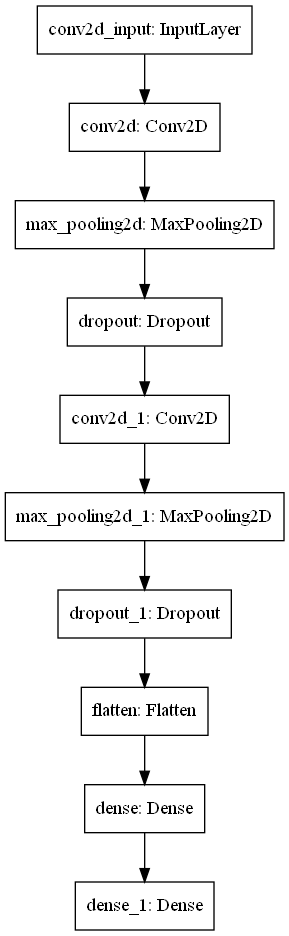

In [12]:
import keras
import pydot
import pydotplus
from pydotplus import graphviz
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [13]:
# Adding test metrics for test generalization

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.02597219869494438 / Test accuracy: 0.992900013923645
